In [1]:
include("../../HamiltonODE.jl")
using Plots
using LaTeXStrings
pyplot();

Finished loading HamiltonSystem
Finished loading HamiltonSteps
Finished loading HamiltonIntegrator
Finished loading HamiltonPlot
Finished loading HamiltonInterpolate
Finished loading HamiltonODE


In [2]:
d = 2
m = ((2,2/3),)
q0 = [0.5,1.0]
p0 =[0.1,0.1]

phi(r) = 4*(r^-12-r^-6)
dphi(r) = 4*(-12*r^-13 +6*r^-7)

U(q) = 2*phi(norm(q))+phi(2*q[1])
F(q) =-2*dphi(norm(q))*q/norm(q)-dphi(2*q[1])*2*[1,0]


HS = HamiltonSystem(d,m,q0,p0,F,U);

In [3]:
T=1.5

Is = [
    [Integrator(euler_step,0.1*2.0^-i,T) for i in 0:4];
    Integrator(verlet_step,1e-5,T)
    ];
ts,Qs,Ps = integrate(HS,Is);

Integrating using verlet_step dt = 1.0e-5...100%|███████| Time: 0:00:07


In [4]:
names = getNames(Is)
EnergyErrors = getEnergyErrors(HS,Qs,Ps);

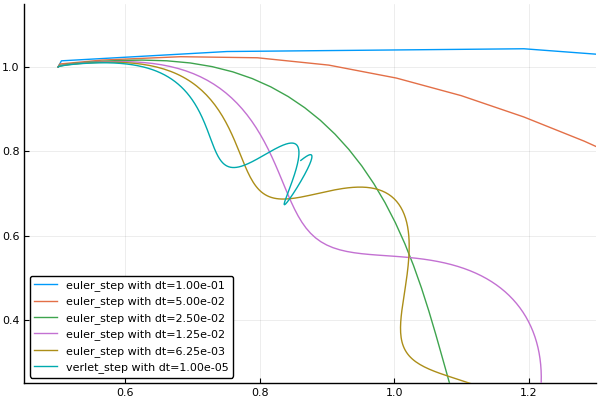

In [5]:
plotOrbits(Qs,names,xlim=(0.45, 1.3),ylim=(0.25,1.15))

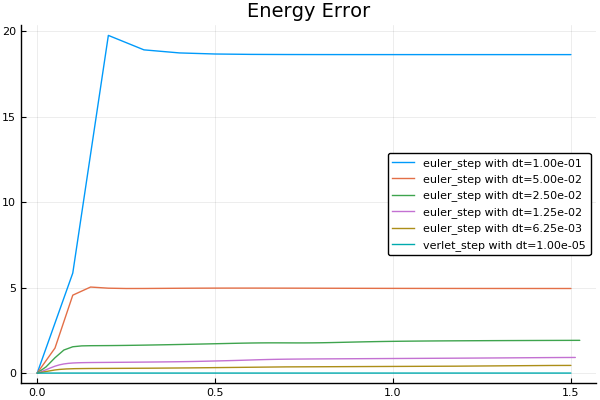

In [8]:
plot(ts,EnergyErrors,label=hcat(names...),title="Energy Error")

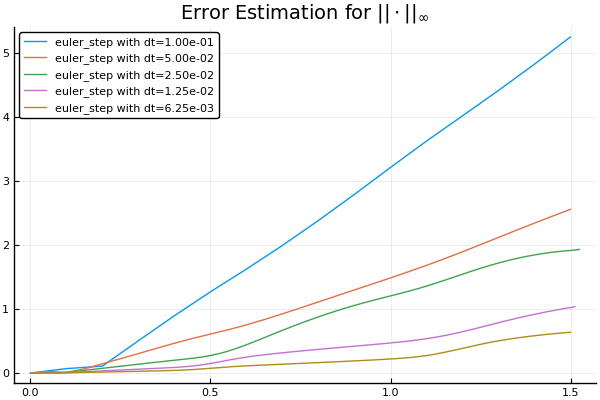

In [7]:
sol=Qs[end]
tsol = ts[end]
Matrix2Array(M) = [M[:,i] for i in 1:size(M,2)]
M2A(M) = Matrix2Array(M)
inter_sols = map(t -> linearSplineInterpolation(tsol,sol,t),ts[1:end-1])

MaximumErrorEstimation=[map(norm,M2A(Q).-inter_sol) for (Q,inter_sol) in zip(Qs[1:end-1],inter_sols)]
plot(ts[1:end-1],MaximumErrorEstimation,label=hcat(names[1:end-1]...),
    title=L"Error Estimation for $||\cdot||_\infty$")